Problem Statement: Predicting Customer Churn in a Telecom Company

In a telecom company, customer churn (the rate at which customers leave the service) is a critical concern. To address this issue, a study was conducted on a dataset of 5000 customers. The dataset contains various customer attributes, usage patterns, and whether or not they churned.

Here are some key details about the dataset:

Number of Customers: 5000

Attributes: Various customer attributes such as age, monthly subscription cost, contract duration, internet usage, customer service interactions, and more.

Target Variable: Churn (binary variable): 1 if the customer churned (left the service), 0 if the customer did not churn (remained with the service).

The study found that:

Customers with longer contract durations were less likely to churn.
Customers who interacted with customer service frequently were more likely to churn.
Customers with higher monthly subscription costs were less likely to churn.
Age seemed to have an impact on churn as well.
The dataset is split into training and testing sets. The task is to build a predictive model that can accurately predict customer churn based on the provided features. The company wants to reduce churn by identifying at-risk customers early and taking proactive measures to retain them.

In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras.layers import Dense

In [2]:
data = pd.read_csv("synthetic_customer_churn.csv")
data.head(10)

,Age,ContractDuration,MonthlySubscriptionCost,CustomerServiceInteractions,InternetUsage(GB),TotalAmountSpent,PaymentMethod,Churn
0,62,2,72.076561,6,24.029980,64.386893,CreditCard,1
1,65,6,82.148698,4,2.363787,490.946829,BankTransfer,0
2,82,15,73.207606,5,59.965752,291.393690,CreditCard,0
3,27,10,52.594528,7,55.813682,349.821288,PayPal,0
4,39,22,62.043675,4,52.726821,148.225467,BankTransfer,0
5,54,4,71.193415,6,65.271043,463.975118,BankTransfer,0
6,30,31,24.655175,4,36.734995,499.272344,BankTransfer,0
7,76,24,71.071362,4,36.426425,121.105576,BankTransfer,1
8,83,18,95.415929,8,96.915525,328.844695,CreditCard,0
9,57,11,83.385385,7,6.260347,182.730914,PayPal,0


In [11]:
label_encoder = LabelEncoder()
data['PaymentMethod'] = label_encoder.fit_transform(data['PaymentMethod'])

X = data.drop("Churn", axis = 1)
y = data['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2)

In [16]:
#model creation
model = Sequential()
model.add(Dense(units = 32, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 50, validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 2s 8ms/step - loss: 0.4060 - accuracy: 0.8497 - val_loss: 0.2962 - val_accuracy: 0.8425
Epoch 2/50
100/100 [==============================] - 1s 5ms/step - loss: 0.2154 - accuracy: 0.9025 - val_loss: 0.1915 - val_accuracy: 0.9262
Epoch 3/50
100/100 [==============================] - 0s 5ms/step - loss: 0.1432 - accuracy: 0.9484 - val_loss: 0.1436 - val_accuracy: 0.9525
Epoch 4/50
100/100 [==============================] - 0s 5ms/step - loss: 0.1126 - accuracy: 0.9553 - val_loss: 0.1228 - val_accuracy: 0.9538
Epoch 5/50
100/100 [==============================] - 1s 5ms/step - loss: 0.0977 - accuracy: 0.9600 - val_loss: 0.1126 - val_accuracy: 0.9550
Epoch 6/50
100/100 [==============================] - 1s 5ms/step - loss: 0.0885 - accuracy: 0.9644 - val_loss: 0.1059 - val_accuracy: 0.9638
Epoch 7/50
100/100 [==============================] - 1s 5ms/step - loss: 0.0829 - accuracy: 0.9641 - val_loss: 0.1015 - val_accuracy: 0.9638
Epoch 

In [18]:
y_pred = np.round(model.predict(X_test))

y_pred

32/32 [==============================] - 0s 3ms/step


array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],

<Figure size 576x432 with 0 Axes>

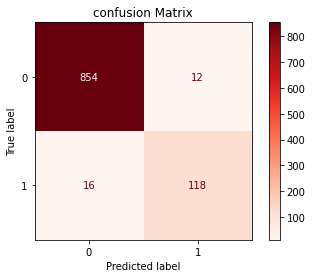

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels = ['0', '1'])

plt.figure(figsize = (8, 6))
disp.plot(cmap = plt.cm.Reds)
plt.title("confusion Matrix")
plt.show()

In [20]:
((854 + 118) / (854 + 12 + 16 + 118)) * 100

97.2